## Oscillateur de Duffing : analyse de la courbe de résonance

Après un changement de variable pour alléger la notation et dédimensionaliser les paramètres, on retrouve l'équation suivante :


\begin{equation} 
|q_0|^2[(|q_0|^2 - \Omega)^2 + 1] = F_0^2 
\end{equation}

Avec :

$$ Ω = \frac{(ω-ω_0)}{γ_m/2},\qquad F_0 = \frac{\sqrt{3γ}}{2(ωγ_m)^{3/2}}f_0$$ 

Et $|q_0|$ la solution stationnaire pour l'amplitude d'oscillation

Sous cette forme, l'analyse de la courbe n'est pas facile car on ne peut pas exprimer $|q_0|$ en tant que fonction de $Ω$. Mais il est possible d'exprimer $Ω$ en fonction de $|q_0|$ :

$$ (|q_0|^2 - \Omega)^2 = \frac{F_0^2}{|q_0|^2} - 1 $$

On peut inverser les signes dans la formule au carré pour trouver

\begin{equation*}
Ω = |q_0|^2 \pm \sqrt{\frac{F_0^2}{|q_0|^2} - 1 }
\end{equation*}

Ce qu'on peut décomposer en deux fonctions

$$ \Omega_+(q_0) =  |q_0|^2 + \sqrt{\frac{F_0^2}{|q_0|^2} - 1} $$
$$ \Omega_-(q_0) =  |q_0|^2 - \sqrt{\frac{F_0^2}{|q_0|^2} - 1} $$

Par inspection, on obtient les conditions suivantes :

$$ 0 < |q_0| \leq F_0$$

Donc on sait déjà que l'amplitude maximale est de $F_0$.

$$\lim_{|q_0|\to 0^+} Ω_+ = +∞$$
$$\lim_{|q_0|\to 0^+} Ω_- = -∞$$
$$\lim_{|q_0|\to F_0} Ω_+ = \lim_{|q_0|\to F_0} Ω_- = F_0^2$$

On peut calculer les dérivés par rapport à $|q_0|^2$

$$ Ω_+'(|q_0|^2) = 1 - \frac{1}{2}\left(\frac{(|q_0|^2)^3}{F_0^2} - \frac{(|q_0|^2)^4}{F_0^4}\right)^{-1/2}$$

Cet dériver peut s'annuler, et quand elle s'annulle, la condition suivante est satisfaite :

$$ \frac{(|q_0|^2)^3}{F_0^2} - \frac{(|q_0|^2)^4}{F_0^4} - \frac{1}{4} = 0 $$

Ce n'est pas facile à résoudre, ni pour $|q_0|^2$ et encore moins pour $|q_0|$. Au moins on sait qu'il peut y avoir des points tournants.
Quant à $Ω_-$

$$ Ω_-'(|q_0|^2) = 1 + \frac{1}{2}\left(\frac{(|q_0|^2)^3}{F_0^2} - \frac{(|q_0|^2)^4}{F_0^4}\right)^{-1/2} $$

La dérivée est toujours strictement positive, donc $Ω_-$ est strictement croissante

$$ Ω_+''(|q_0|^2) = + \frac{1}{4}\left(\frac{(|q_0|^2)^3}{F_0^2} - \frac{(|q_0|^2)^4}{F_0^4}\right)^{-3/2}\left( \frac{3(|q_0|^2)^2}{F_0^2} - 
\frac{4(|q_0|^2)^3}{F_0^4} \right)$$

Lorsque celle-ci s'annulle (point d'inflexion) on à la condition (qui est identique pour $Ω_-''$) :
$$ (|q_0|^2)^2 \left( \frac{3}{F_0^2} - \frac{4|q_0|^2}{F_0^4} \right) = 0 $$
$$ |q_0|^2 = \frac{3}{4}F_0^2 $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

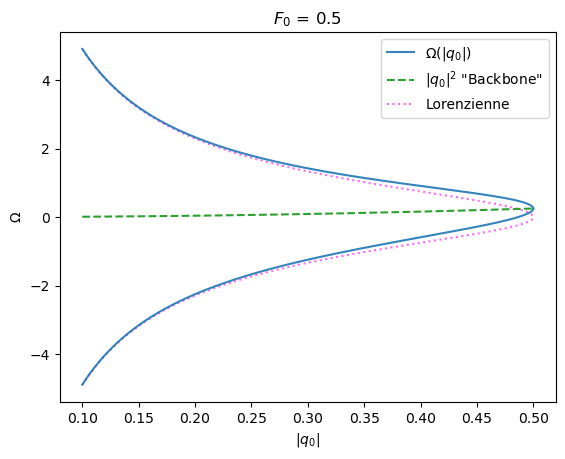

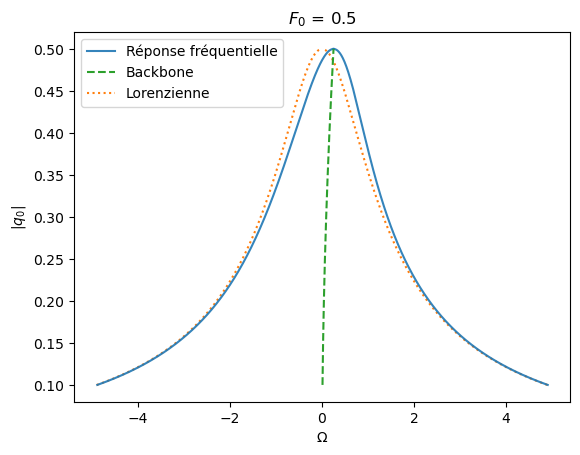

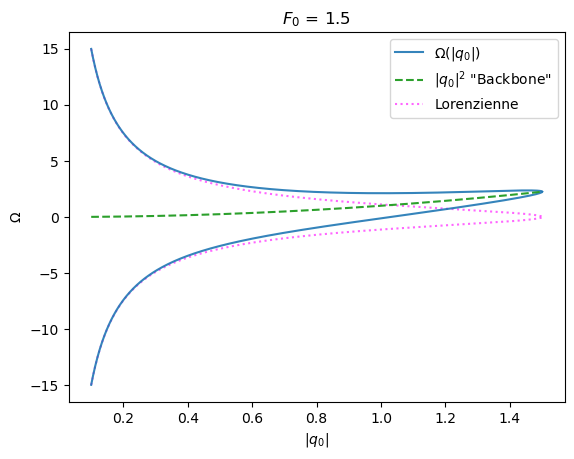

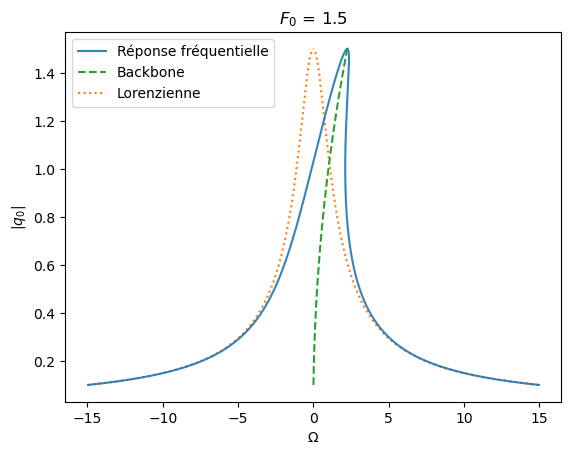

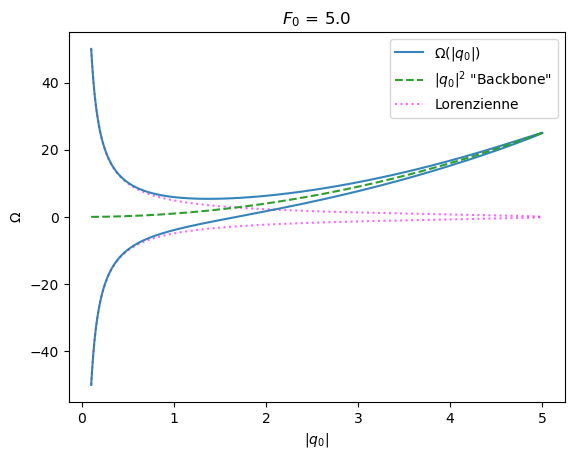

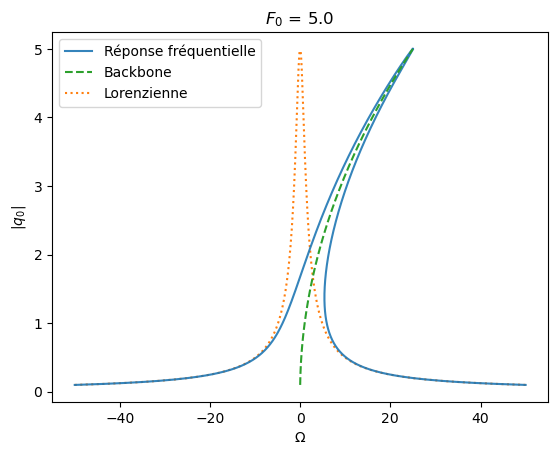

In [6]:
def omeg_p(q, f):
    q2 = q**2
    return q2 + np.sqrt(f**2/q2 - 1)

def omeg_m(q, f):
    q2 = q**2
    return q2 - np.sqrt(f**2/q2 - 1)

def lorenz_inv(q2, f):
    return np.sqrt(f**2/q2 - 1)



#F_0 = np.linspace(0.4, 5, 10)
F_0 = [0.5, 1.5, 5.0]
for f in F_0:
    q_0 = np.linspace(0.1, f, 1000)
    q2 = q_0**2
    l = lorenz_inv(q2, f)
    w_p = q2 + l #omeg_p(q_0, f)
    w_m = q2 - l #omeg_m(q_0, f)

    
    plt.plot(q_0, w_p, color="tab:blue", alpha=0.9, label="$\Omega(|q_0|)$")
    plt.plot(q_0, w_m, color="tab:blue", alpha=0.9)
    plt.plot(q_0, q_0**2, linestyle="dashed", color="tab:green", label='$|q_0|^2$ "Backbone"')
    plt.plot(q_0, +l, color="magenta", alpha=0.6, linestyle="dotted", label="Lorenzienne", zorder=-3)
    plt.plot(q_0, -l, color="magenta", alpha=0.6, linestyle="dotted", zorder=-3)
    plt.title(f"$F_0$ = {f:.3}")
    plt.xlabel("$|q_0|$")
    plt.ylabel("$\Omega$")
    plt.legend(loc="upper right")
    plt.legend()
    plt.savefig(f"figs/bistability/rev_F0={f}.png", dpi=300, format='png', transparent=False, bbox_inches='tight')
    plt.show()

    plt.plot(w_p, q_0, color="tab:blue", alpha=0.9, label="Réponse fréquentielle")
    plt.plot(w_m, q_0, color="tab:blue", alpha=0.9)
    plt.plot(q_0**2, q_0, linestyle="dashed", color="tab:green", label='Backbone')
    plt.plot(+l, q_0, color="tab:orange", alpha=1, linestyle="dotted", label="Lorenzienne", zorder=-3)
    plt.plot(-l, q_0, color="tab:orange", alpha=1, linestyle="dotted", zorder=-3)
    plt.ylabel("$|q_0|$")
    plt.xlabel("$\Omega$")
    plt.title(f"$F_0$ = {f:.3}")
    plt.legend(loc="upper left")
    plt.savefig(f"figs/bistability/F0={f}.png", dpi=300, format='png', transparent=False, bbox_inches='tight')
    plt.show()


Pour analyser le graph, on peut décomposer $Ω$ d'une manière différente.

$$Ω = |q_0|^2 \pm \sqrt{\frac{F_0^2}{|q_0|^2} - 1 }$$

Avec $|q_0|^2$ la "backbone" et $\pm \sqrt{\frac{F_0^2}{|q_0|^2} - 1 }$ la lorenzienne pure

Effectivement, si :

$$ Ω = \pm \sqrt{\frac{F_0^2}{|q_0|^2} - 1 } $$
$$ Ω^2 + 1 =  \frac{F_0^2}{|q_0|^2}$$
$$ |q_0|^2 = \frac{F_0^2}{ Ω^2 + 1}$$

$Ω \propto (ω - ω_0)$ donc c'est bien la fonction lorenzienne qu'on retrouve dans le cas d'un oscillateur harmonique.

On voit que plus $F_0$ est petit, plus l'amplitude maximale $|q_0|_{max} = F_0$ est limité et moins la fonction backbone (quadratique) est importante. Plus $F_0$ est grand, plus la backbone est importante et plus la fonction de résonance se distorte pour la suivre.

Pour $F_0 \to 0$ la réponse devient lorenzienne. Effectivement, comme $F_0 \propto \sqrt{\gamma} f_0$, si le coefficient de non-linéarité est nulle ou négligeable (et $f_0$ pas trop grand), alors le système se comportera comme un oscillateur harmonique.

On observe aussi qu'il existe une valeur critique $F_{0,c}$ où pour $F_0 > F_{0,c}$ le système admet jusqu'à trois amplitudes possible par fréquence de forçage $Ω$. Les solutions se trouvant entre les deux points tournants de la courbe bleu sont notamment des oscillations instables, qui ne peuvent être atteint que avec des conditions initiales particulière et qui, à la moindre action sur le système, vont se mettre à osciller selon l'une des deux branches stables au dessus et en dessous. Cette situation de bistabilité est aussi un exemple interessant de hystérèse, où l'état d'oscillations que le système va adopter va dépendre de l'histoire du système. Si on augmente la fréquence de forçage depuis $ω_0$ ($Ω = 0$), l'amplitude va augmenter selon la courbe orange. Puis, arrivé arrivé au pic d'amplitude à $q_0 = F_0$, l'amplitude d'oscillation va abruptement tomber juste en dessous sur la courbe bleu. De même dans le cas d'une oscillation décroissante, un saut verticale sera observé une fois passé par le point tournant (le minimum).

$F_0 = F_{0,c}$ correspond à la situation où les deux points tournants et le point d'inflexion de la courbe se rejoignent en un point, donc où la dérivée première et seconde s'annullent.

La condition qu'on à trouvé pour la dérivée première est difficile à utiliser, donc on va se servir d'une méthode traité dans le livre *Mécanique Vol. 1* de Landau et Lifshitz (pg. 88).

### Méthode Landau-Lifshitz

On revient à l'équation de départ. À présent, pour alléger la notation, je vais me permettre d'écrire $q_0$ au lieu de $|q_0|$ en gardant en tête que ce sera toujours le module dont on parle.
\begin{equation}
q_0^2[(q_0^2 - \Omega)^2 + 1] = F_0^2
\end{equation}
Et on dérive directement par rapport à $Ω$, en rappelant que $\frac{dU(q_0)}{dΩ} = \frac{dU}{dq_0}\frac{dq_0}{dΩ}$ (dérivée implicite car $q_0$ dépend de Ω)

$$ 2q_0\frac{dq_0}{dΩ}(q_0^4 + Ω^2 - 2Ωq_0^2 + 1) + q_0^2(4q_0^3\frac{dq_0}{dΩ} + 2Ω - 2q_0^2 - 4Ωq_0\frac{dq_0}{dΩ}) = \frac{d}{dΩ}F_0^2 $$

On remarque que $F_0$ et $Ω$ dépendent tout les deux de $ω$, qui est la vrai fréquence de forçage. Toutefois, pour dériver l'équation d'origine, on à supposé $\omega \approx ω_0$. Donc : 
$$Ω \propto (ω - ω_0) \ll ω $$
C'est à dire qu'en variant $Ω$, la variation correspondante que subira $F_0$ sera très petite. Donc on se permet de la considérer comme étant constante.

$$ 2q_0\frac{dq_0}{dΩ}(q_0^4 + Ω^2 - 2Ωq_0^2 + 1) + q_0^2(4q_0^3\frac{dq_0}{dΩ} + 2Ω - 2q_0^2 - 4Ωq_0\frac{dq_0}{dΩ}) = 0 $$
En multipliant par $\frac{1}{2q_0}$
$$ \frac{dq_0}{dΩ}(q_0^4 + Ω^2 - 2Ωq_0^2 + 1) + (2q_0^4\frac{dq_0}{dΩ} + Ωq_0 - q_0^3 - 2Ωq_0^2\frac{dq_0}{dΩ}) = 0 $$
Et en regroupant les multiples de $\frac{dq_0}{dΩ}$
$$ \frac{dq_0}{dΩ}(3q_0^4 + Ω^2 - 4Ωq_0^2 + 1) + (Ωq_0 - q_0^3) = 0 $$
Touches finales
$$\frac{dq_0}{dΩ} = (-Ωq_0 + q_0^3)/(3q_0^4 + Ω^2 - 4Ωq_0^2 + 1)$$

D'abord, on peut vérifier la valeur de l'amplitude maximale, qui est atteint lorsque $\frac{dq_0}{dΩ} = 0$, ce qui nous donne la condition suivante
$$|q_{0}|_{max}^2 = Ω$$
En réinsérant dans $(1)$ :
$$Ω = F_0^2 = |q_{0}|_{max}^2$$
Ce qui correspond à ce qu'on avait déjà trouvé

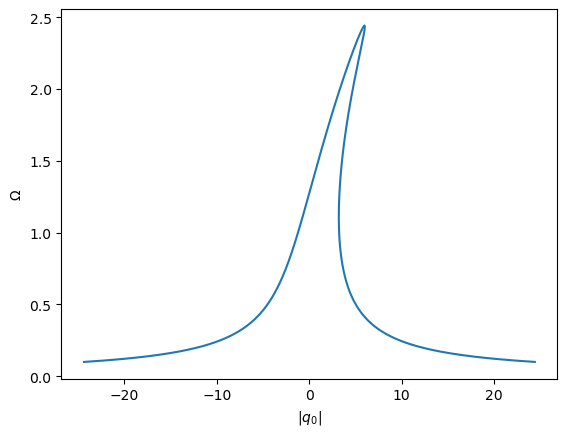

In [4]:
F = 2.44
q_0 = np.linspace(0.1, F, 1000)
q2 = q_0**2
l = lorenz_inv(q2, F)
w_p = q2 + l
w_m = q2 - l
plt.plot(w_p, q_0, color="tab:blue")
plt.plot(w_m, q_0, color="tab:blue")
plt.xlabel("$|q_0|$")
plt.ylabel("$\Omega$")
plt.show()

Quant au points tournants élusives, vu qu'on considère maintenant la dérivé de $q_0$ par rapport à $Ω$, ils apparaissent lorsque $\frac{dq_0}{dΩ} = ∞$, ce qui nous donne la condition :
$$ 3(q_0^2)^2 - 4Ωq_0^2 + Ω^2 + 1 = 0 $$
Les positions des points critiques sont donc déterminés par les solutions simultanées de cette équation et de $(1)$. Dans le cas $F_0 = F_{0,c}$, tous les points critiques se rejoignent à un point. 

On résout donc pour $q_0^2$ avec le déterminant qui s'annulle :
$$ \Delta =  16Ω^2 - 12Ω^2 - 12 = 0$$
$$ Ω = \pm \sqrt{3}$$
$$ q_0^2 = \frac{2Ω}{3}$$
Ce qui impose une solution unique pour $Ω$
$$ Ω = \sqrt{3} $$

En substituant ces valeurs dans $(1)$ :

$$ F_{0,c} = \left( \frac{8\sqrt{3}}{9} \right)^{1/2} $$

En faisant un vérification graphique rapide

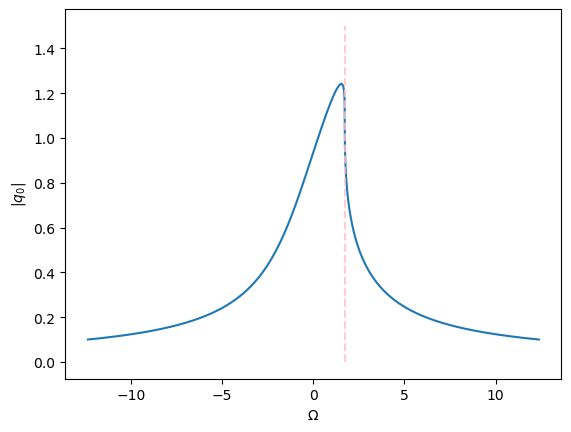

In [5]:


F = np.sqrt(8*np.sqrt(3)/9)

ws = np.sqrt(3)
qline = np.linspace(0, 1.5, 100)
wline = [ws for e in qline]


q_0 = np.linspace(0.1, F, 1000)
q2 = q_0**2
l = lorenz_inv(q2, F)
w_p = q2 + l
w_m = q2 - l
plt.plot(w_p, q_0, color="tab:blue")
plt.plot(w_m, q_0, color="tab:blue")
plt.plot(wline, qline, color="pink", linestyle="dashed", alpha=0.8)
plt.xlabel("$\Omega$")
plt.ylabel("$|q_0|$")
plt.show()

Un observation finale interessante. Etant donné que $F_0 \propto \sqrt{γ}f_0$, on voit que même dans un système ou le terme nonlinéaire est très faible, où normalement on ne va pas observer de non-linéarité. Il suffit d'augmenter l'amplitude de forçage $f_0$ pour que faire ressortir un comportement non-linéaire. On voit donc que l'oscillateur harmonique, dans la plupart des cas physiques, n'est qu'une appromation valable à des amplitudes pas trop hautes.